# Supervised Machine Learning: Regression Analysis

In [1]:
### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Define a path variable
path = r'C:\Users\Sreelakshmi\Desktop\Achievement6'

# import the dataset 
df = pd.read_csv(os.path.join(path,'Project', 'Data', 'Prepared Data', 'Cleaned_Conditions_Contributing_to_COVID-19_Deaths_by_State_and_Age_Provisional_2020-2023.csv'), index_col= False)

In [5]:
df.head()

,Data As Of,Start Date,End Date,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,09/24/2023,01/01/2020,01/31/2020,2020.0,1.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
1,09/24/2023,02/01/2020,02/29/2020,2020.0,2.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
2,09/24/2023,03/01/2020,03/31/2020,2020.0,3.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
3,09/24/2023,04/01/2020,04/30/2020,2020.0,4.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
4,09/24/2023,05/01/2020,05/31/2020,2020.0,5.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN


### 2. Data Cleaning: This step is already done in the previous exercises

### 3. Data prep for Regression Analysis

##### 3.1. Create a scatterplot  

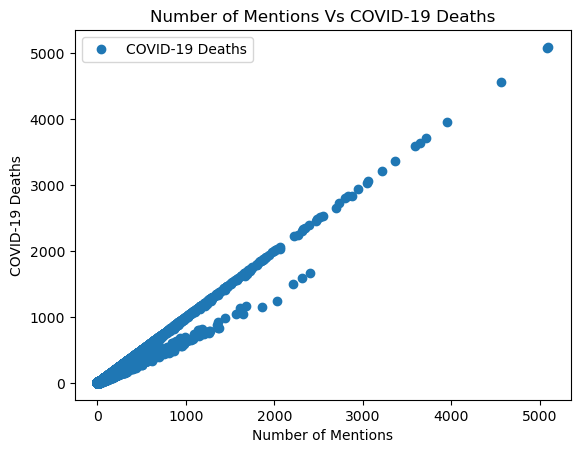

<Figure size 640x480 with 0 Axes>

In [6]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Number of Mentions', y='COVID-19 Deaths',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of Mentions Vs COVID-19 Deaths')  
plt.xlabel('Number of Mentions')  
plt.ylabel('COVID-19 Deaths')  
plt.show()
plt.savefig(os.path.join(path,'Project', 'Visualizations', 'correlation.png'))

##### 3.2. Define a Hypothesis

#### 'If the number of mentions of conditions on death certificate is higher, then the number of COVID-19 Deaths is also higher'.

In [7]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['Number of Mentions'].values.reshape(-1,1)
y = df['COVID-19 Deaths'].values.reshape(-1,1)

In [8]:
# Split the data into two sets: a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
# Create a regression object.
regression = LinearRegression()

In [10]:
# Fit the model you created to the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [11]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

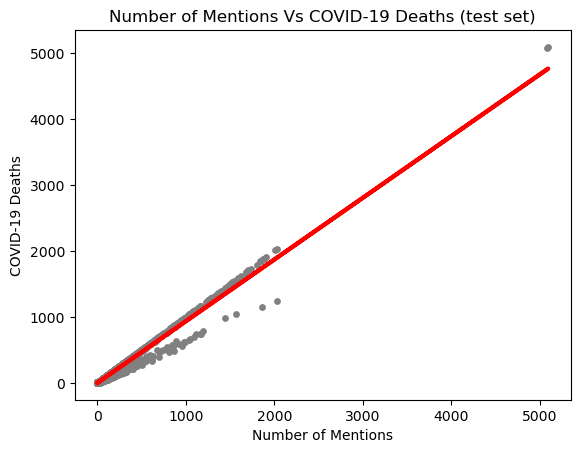

<Figure size 640x480 with 0 Axes>

In [16]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of Mentions Vs COVID-19 Deaths (test set)')  
plot_test.xlabel('Number of Mentions')  
plot_test.ylabel('COVID-19 Deaths')  
plot_test.show()
plot_test.savefig(os.path.join(path,'Project', 'Visualizations', 'regression.png'))

#### The linear model represented by the red regression line mostly covers all of data points except a few. In order to check the accuracy of the model, we need to check model’s summary statistics—namely, slope, root mean squared error, and r-squared value.

In [13]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [14]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.93562941]]
Mean squared error:  63.66636518202215
R2 score:  0.9765301104052365


#### Here we have relatively low MSE i.e. 63.66 and high r2 value of 0.976 which indicates that the model's predictions are close to the actual values. So we can estimate the number of COVID-19 Deaths based on number of mentions of conditions in the death certificate.

In [15]:
# Compare the predicted y values with the actual y values in a dataframe.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.0,2.707360
1,0.0,-0.099528
2,0.0,-0.099528
3,7.0,3.642989
4,0.0,-0.099528
5,0.0,-0.099528
6,1.0,6.449877
7,8.0,6.449877
8,0.0,-0.099528
9,5.0,5.514248


#### Potential Bias

##### Sample Bias: There is a high chance of sample bias as different States have their own method of reporting deaths. Also many death counts are suppressed by
##### the government authorities.
##### Measurement Bias: Same death with various conditions may be counted multiple times leading to inaccurate data.